In [77]:
import os
import pandas as pd
import numpy as np
import torch
from PIL import Image
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


# Visualise classes


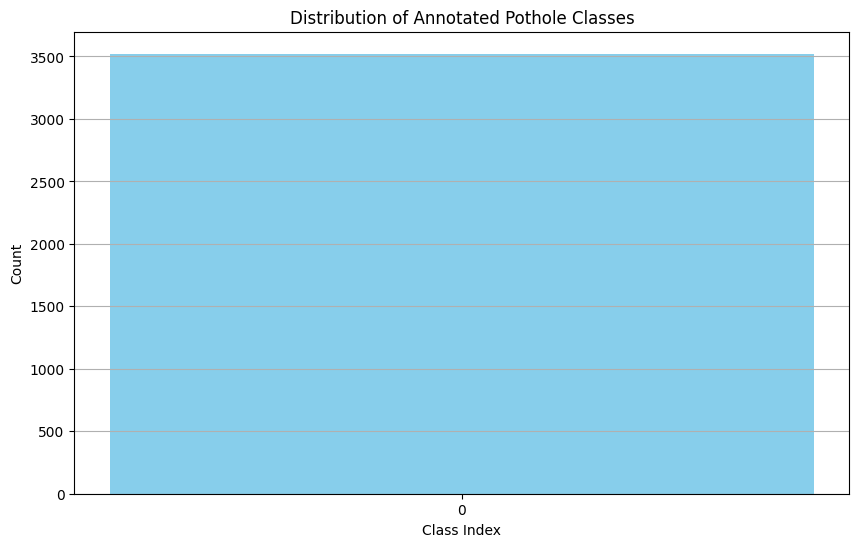

In [79]:
import os
import matplotlib.pyplot as plt

# Directory containing the .txt files
folder_path ='C:/Users/USER/Downloads/ITX_Screening_Test-master/Dataset'

class_counts = {}  # Dictionary to store counts for each class

# Iterate through each .txt file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename), 'r') as file:
            annotations = [list(map(float, line.split())) for line in file.readlines()]

            for annotation in annotations:
                class_index = int(annotation[0])
                if class_index in class_counts:
                    class_counts[class_index] += 1
                else:
                    class_counts[class_index] = 1

# Extract class indices and counts for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Distribution of Annotated Pothole Classes')
plt.xticks(classes)  # Set x-axis ticks as class indices
plt.grid(axis='y')

plt.show()


In [80]:
import os
import shutil
import random


# Source directory where your files are located
source_directory = 'C:/Users/USER/Downloads/ITX_Screening_Test-master/Dataset'
# Destination root directory for the custom dataset structure
destination_root = 'C:/Users/USER/Downloads/ITX_Screening_Test-master/SortDataset'


In [81]:

# Create the necessary directory structure
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(destination_root, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(destination_root, 'labels', split), exist_ok=True)


In [82]:

# List all the files in the source directory
file_list = os.listdir(source_directory)
random.shuffle(file_list)  # Shuffle the file list randomly

# Separate image and label files
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
label_files = [file for file in file_list if file.lower().endswith('.txt')]


In [83]:

# Calculate the number of files for each split
total_files = len(image_files)
train_count = int(0.7 * total_files)
val_count = int(0.15 * total_files)


In [84]:

# Assign files to train, validation, and test splits
train_images = image_files[:train_count]
val_images = image_files[train_count:train_count + val_count]
test_images = image_files[train_count + val_count:]


In [85]:
# Function to copy files to destination directories
def copy_files(files, destination_folder):
    for filename in files:
        source_file = os.path.join(source_directory, filename)
        destination_dir = os.path.join(destination_root, destination_folder)
        destination_file = os.path.join(destination_dir, filename)
        
        shutil.copy(source_file, destination_file)


In [86]:
# Copy files to respective splits
copy_files(train_images, 'images/train')
copy_files(val_images, 'images/val')
copy_files(test_images, 'images/test')

# You can also copy label files (.txt) in a similar way if needed
# Modify the paths accordingly for label files

In [87]:

# Function to copy label files to destination directories
def copy_label_files(files, destination_folder):
    for filename in files:
        source_file = os.path.join(source_directory, filename)
        destination_dir = os.path.join(destination_root, 'labels', destination_folder)
        destination_file = os.path.join(destination_dir, filename)
        
        shutil.copy(source_file, destination_file)

# Assign label files to corresponding splits based on image splits
train_label_files = [label_file for label_file in label_files if label_file.replace('.txt', '.JPG') in train_images]
val_label_files = [label_file for label_file in label_files if label_file.replace('.txt', '.JPG') in val_images]
test_label_files = [label_file for label_file in label_files if label_file.replace('.txt', '.JPG') in test_images]


# Copy label files to respective splits
copy_label_files(train_label_files, 'train')
copy_label_files(val_label_files, 'val')
copy_label_files(test_label_files, 'test')